In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

import os


In [19]:
# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data  # Features
target = iris.target  # Labels
feature_names = iris.feature_names

dataset = pd.DataFrame(data, columns=feature_names)  
 
dataset['Target'] = target


print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

Dataset Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Target']
****************************
Dataset Shape: (150, 5)
****************************
Total Rows in dataset File: 150


In [20]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (149, 5)
****************************
Remaining Rows in Dataset: 149
****************************
Total Duplicates: 1


In [21]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 149
****************************
Removed Number of rows containing Null Values: 0


In [22]:
cleanedDataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [24]:
unique_classes = cleanedDataset[cleanedDataset.columns.to_list()[-1]].unique()
print("Unique Target Classes:", unique_classes)

Unique Target Classes: [0 1 2]


In [25]:
# Encode the target column if it's categorical
if cleanedDataset[cleanedDataset.columns.to_list()[-1]].dtype == 'object':
    cleanedDataset[cleanedDataset.columns.to_list()[-1]] = cleanedDataset[cleanedDataset.columns.to_list()[-1]].astype('category').cat.codes


In [26]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


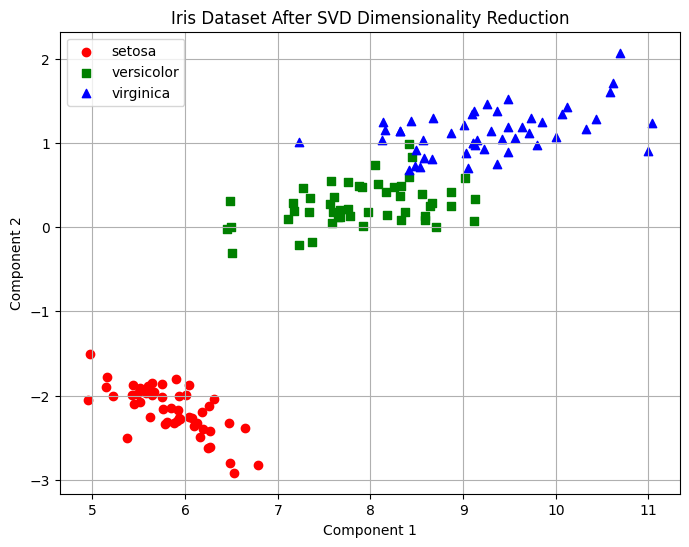

Explained Variance (Singular Values): [0.52875361 0.44845576]


In [27]:
# Step 2: Apply SVD
# Using TruncatedSVD to reduce to 2 components
svd = TruncatedSVD(n_components=2, random_state=42)
data_reduced = svd.fit_transform(data)

# Step 3: Visualize the reduced data
plt.figure(figsize=(8, 6))
for label, color, marker in zip(range(3), ['r', 'g', 'b'], ['o', 's', '^']):
    plt.scatter(
        data_reduced[target == label, 0],
        data_reduced[target == label, 1],
        color=color,
        marker=marker,
        label=iris.target_names[label]
    )

plt.title('Iris Dataset After SVD Dimensionality Reduction')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Inspect Singular Values
print("Explained Variance (Singular Values):", svd.explained_variance_ratio_)


In [28]:
data_reduced.shape

(150, 2)

In [29]:
# Using TruncatedSVD to reduce to 2 components
svd2 = TruncatedSVD(n_components=3, random_state=42)
data_reduced2 = svd2.fit_transform(data)
data_reduced2.shape

(150, 3)